In [2]:
import pandas as pd

df = pd.read_excel(
    '/Users/rustem/Desktop/test_habr.xlsx', sheet_name='Квалификация'
)

In [4]:
#Выведем датафрейм, чтобы просто посмотреть
df

,User_id,Salary,City,Specialization,Grade
0,819942,658648,Нижний Новгород,Поддержка,Senior
1,669156,577622,Санкт-Петербург,Маркетинг,Senior
2,822644,109060,Уфа,Поддержка,Middle
3,729779,384878,Краснодар,Аналитика,Senior
4,668903,447787,Самара,Поддержка,Senior
...,...,...,...,...,...
1035,810199,75737,Иркутск,Маркетинг,Junior
1036,901722,505221,Мурманск,Маркетинг,Teamlead
1037,697500,208264,Уфа,Маркетинг,Teamlead
1038,422811,281106,Самара,Поддержка,Senior


In [7]:
#Просмотрим информацию по таблице, данные чистые, можно анализировать
df.info()
data = df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User_id         1040 non-null   int64 
 1   Salary          1040 non-null   int64 
 2   City            1040 non-null   object
 3   Specialization  1040 non-null   object
 4   Grade           1040 non-null   object
dtypes: int64(2), object(3)
memory usage: 40.8+ KB


<Axes: >

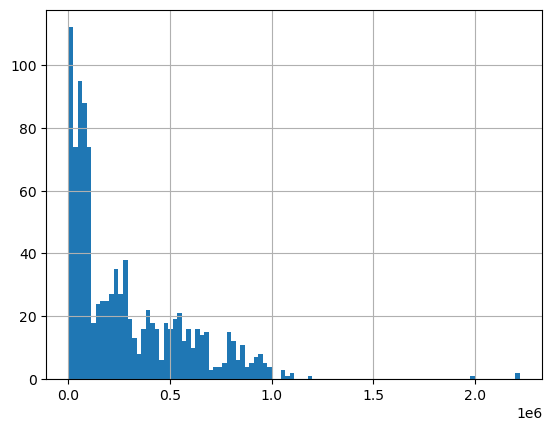

In [58]:
#Проверяю общее распределение зарплат по всем грейдам и специальностям. Вижу распределение смещенное вправо. Пока это ничего мне не говорит.
data['Salary'].hist(bins = 100)

In [10]:
# Начнем с группировки данных по грейду. В пределах грейда значения зарплат будет легче анализировать по разным специальностям, чем через группировку по специальностям в разрезе грейдов.
grouped_by_grade = data.groupby('Grade')

# Создаем отдельные датафреймы для каждого уровня грейда
grade_data_frames = {}
for grade, grade_data in grouped_by_grade:
    grade_data_frames[grade] = grade_data

# Выводим первые несколько строк каждого датафрейма
for grade, grade_df in grade_data_frames.items():
    print(f"Данные для грейда {grade}:")
    print(grade_df.head())
    print("\n")


Данные для грейда Intern:
    User_id  Salary                      City Specialization   Grade
5    540058    2511                  Таганрог   Тестирование  Intern
6    819011    3131          Великий Новгород   Тестирование  Intern
7    197075   57063  Петропавловск-Камчатский      Маркетинг  Intern
12   265221    3586                  Таганрог   Тестирование  Intern
17   470242   43963                 Краснодар      Маркетинг  Intern


Данные для грейда Junior:
    User_id  Salary                      City Specialization   Grade
16   620560   99978  Петропавловск-Камчатский     Разработка  Junior
35   739852   87833                    Москва      Аналитика  Junior
46   784019   74617          Великий Новгород     Разработка  Junior
50   641168   77577                 Волгоград     Разработка  Junior
52   192463   91201                  Мурманск      Маркетинг  Junior


Данные для грейда Middle:
    User_id  Salary                      City Specialization   Grade
2    822644  109060  

Видим, что имеем разброс в зарплатах внутри грейдов

In [16]:
# Напишем названия переменных наших датафреймов
intern_df = grade_data_frames.get("Intern")
junior_df = grade_data_frames.get("Junior")
middle_df = grade_data_frames.get("Middle")
senior_df = grade_data_frames.get("Senior")
teamlead_df = grade_data_frames.get("Teamlead")

In [84]:
# Далее я вывожу данные по каждому датафрейму грейдов.
# Вывод данных для грейда 'Интерн'
print("Данные для грейда 'Интерн':")
print(intern_df)

# Вывод данных для грейда 'Junior'
print("\nДанные для грейда 'Junior':")
print(junior_df)

# Вывод данных для грейда 'Middle'
print("\nДанные для грейда 'Middle':")
print(middle_df)

# Вывод данных для грейда 'Senior'
print("\nДанные для грейда 'Senior':")
print(senior_df)

# Вывод данных для грейда 'Teamlead'
print("\nДанные для грейда 'Teamlead':")
print(teamlead_df)


Данные для грейда 'Интерн':
      User_id  Salary                      City Specialization   Grade
5      540058    2511                  Таганрог   Тестирование  Intern
6      819011    3131          Великий Новгород   Тестирование  Intern
7      197075   57063  Петропавловск-Камчатский      Маркетинг  Intern
12     265221    3586                  Таганрог   Тестирование  Intern
17     470242   43963                 Краснодар      Маркетинг  Intern
...       ...     ...                       ...            ...     ...
979    509942    9339                  Мурманск     Разработка  Intern
983    502440   30304           Санкт-Петербург      Аналитика  Intern
1001   910569   68047               Владивосток      Маркетинг  Intern
1011   792990   17112                   Иркутск     Разработка  Intern
1028   487640   36538  Петропавловск-Камчатский      Поддержка  Intern

[196 rows x 5 columns]

Данные для грейда 'Junior':
      User_id  Salary                      City Specialization   Gr

Мы можем начать анализировать аномалии через квартили, боксплоты. Начнем с построения простых гистограм распределения зарплат разных специальностей IT специалистов внутри одного грейда.

<Axes: >

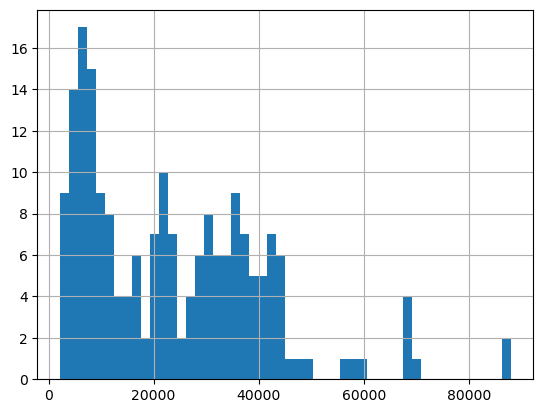

In [36]:
# Гистограмма распределения зарплат интернов по разным специальностям во всех городах
intern_df['Salary'].hist(bins = 50)

Видим, что гистограмма скошена вправо, есть значения похожие на выброс крайние справа. Посмотрим на статистические показатели.

In [66]:
print(intern_df.describe())

             User_id        Salary
count     196.000000    196.000000
mean   557212.214286  23680.642857
std    248217.687479  17097.276053
min    101970.000000   2192.000000
25%    355213.750000   8509.750000
50%    564418.000000  21561.000000
75%    745894.500000  35471.000000
max    994079.000000  88027.000000


Медианное значение зарплат интернов равно 21561 рубль, максимальное - 88027 рублей. Нужно построить боксплоты, чтобы проверить на выбросы это значение. Далее ниже я строю гистограммы для каждой группы грейдов.

<Axes: >

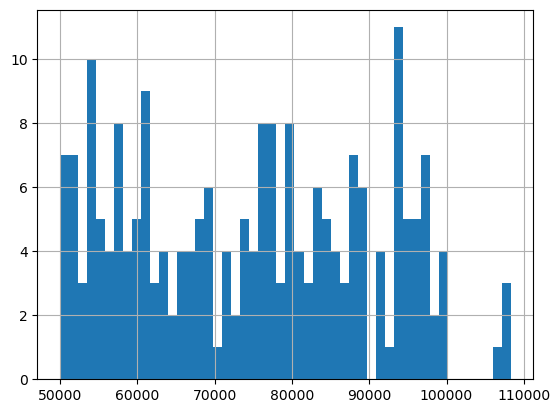

In [52]:
# Гистограмма распределения зарплат джуниор спецциалистов
junior_df['Salary'].hist(bins=50)

У зарплаты джунов по гистограмме сложно сделать выводы.

In [67]:
print(junior_df.describe())

             User_id         Salary
count     214.000000     214.000000
mean   575627.869159   74657.172897
std    239624.281698   15472.844855
min    110226.000000   50011.000000
25%    387681.250000   60605.250000
50%    610476.500000   75790.000000
75%    768799.500000   87431.750000
max    998576.000000  108331.000000


<Axes: >

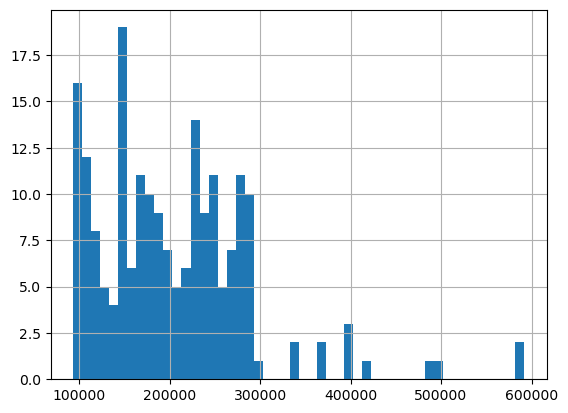

In [34]:
# Гистограмма распределения зарплат мидл спецциалистов
middle_df['Salary'].hist(bins = 50)

Значения зарплат Мидл специалистов находится преимущественно между 145000 и 250000 рублей. Есть отденльно стоящие значения, например зарплата 591865 рублей. Проверим на аномалию.

In [68]:
print(middle_df.describe())

             User_id         Salary
count     198.000000     198.000000
mean   521543.707071  204616.444444
std    274731.178169   85205.297404
min    101214.000000   93531.000000
25%    274188.500000  145066.500000
50%    495758.000000  189748.000000
75%    773358.750000  249934.000000
max    997066.000000  591865.000000


<Axes: >

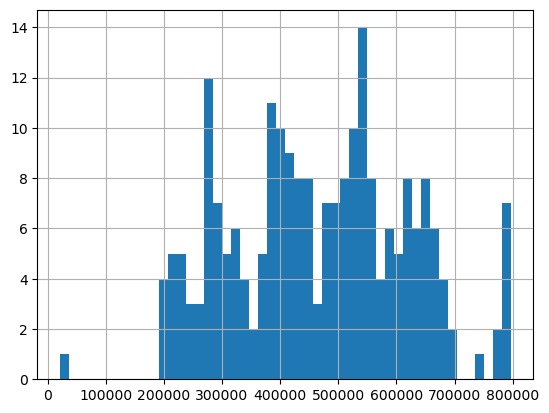

In [33]:
# Гистограмма распределения зарплат синьор спецциалистов
senior_df['Salary'].hist(bins = 50)

По гистограмме видно выбивающееся значение зарплаты синьор специалиста - 21342 рубля. Это значение мы тоже обязательно проверим на боксплоте. Но можно уже сделать предположение, что в данных есть ошибка. Возможно нам не хватает цифры в начале или конце этого значения.

In [69]:
print(senior_df.describe())

             User_id         Salary
count     224.000000     224.000000
mean   549858.892857  467467.053571
std    263023.351047  151201.262673
min    106022.000000   21342.000000
25%    307420.250000  355598.000000
50%    560571.000000  475504.500000
75%    776886.750000  577938.500000
max    998041.000000  796951.000000


<Axes: >

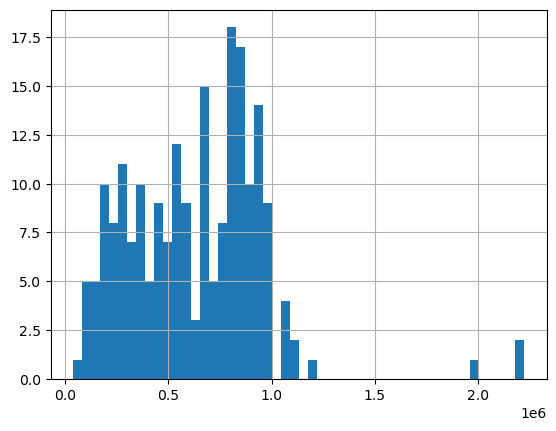

In [32]:
# Гистограмма распределения зарплат Тимлидов 
teamlead_df['Salary'].hist(bins = 50)

In [70]:
print(teamlead_df.describe())

             User_id        Salary
count     208.000000  2.080000e+02
mean   588945.721154  6.316181e+05
std    251107.891461  3.294399e+05
min    105643.000000  4.091300e+04
25%    369950.000000  3.717058e+05
50%    619043.000000  6.558355e+05
75%    810249.250000  8.469292e+05
max    980265.000000  2.222222e+06


In [88]:
#Сделаем статистический анализ данных и посмотрим на границы интервалов значений по правилу трех сигм для каждого грейда

# Расчет средней зарплаты
mean_salary_intern = intern_df['Salary'].mean()

# Расчет стандартного отклонения
std_dev_intern = intern_df['Salary'].std()

# Расчет интервала по правилу трех сигм
lower_bound_intern = mean_salary_intern - 3 * std_dev_intern
upper_bound_intern = mean_salary_intern + 3 * std_dev_intern

# Вывод результатов
print(f"Средняя зарплата для грейда 'Интерн': {mean_salary_intern:.2f}")
print(f"Стандартное отклонение для грейда 'Интерн': {std_dev_intern:.2f}")
print(f"Интервал по правилу трех сигм для грейда 'Интерн': от {lower_bound_intern:.2f} до {upper_bound_intern:.2f}")

Средняя зарплата для грейда 'Интерн': 23680.64
Стандартное отклонение для грейда 'Интерн': 17097.28
Интервал по правилу трех сигм для грейда 'Интерн': от -27611.19 до 74972.47


In [74]:
# Для грейда "Junior"
junior_df = grade_data_frames.get("Junior")
mean_salary_junior = junior_df['Salary'].mean()
std_dev_junior = junior_df['Salary'].std()
lower_bound_junior = mean_salary_junior - 3 * std_dev_junior
upper_bound_junior = mean_salary_junior + 3 * std_dev_junior
print(f"Средняя зарплата для грейда 'Junior': {mean_salary_junior:.2f}")
print(f"Стандартное отклонение для грейда 'Junior': {std_dev_junior:.2f}")
print(f"Интервал по правилу трех сигм для грейда 'Junior': от {lower_bound_junior:.2f} до {upper_bound_junior:.2f}")
print()

# Для грейда "Middle"
middle_df = grade_data_frames.get("Middle")
mean_salary_middle = middle_df['Salary'].mean()
std_dev_middle = middle_df['Salary'].std()
lower_bound_middle = mean_salary_middle - 3 * std_dev_middle
upper_bound_middle = mean_salary_middle + 3 * std_dev_middle
print(f"Средняя зарплата для грейда 'Middle': {mean_salary_middle:.2f}")
print(f"Стандартное отклонение для грейда 'Middle': {std_dev_middle:.2f}")
print(f"Интервал по правилу трех сигм для грейда 'Middle': от {lower_bound_middle:.2f} до {upper_bound_middle:.2f}")
print()

# Для грейда "Senior"
senior_df = grade_data_frames.get("Senior")
mean_salary_senior = senior_df['Salary'].mean()
std_dev_senior = senior_df['Salary'].std()
lower_bound_senior = mean_salary_senior - 3 * std_dev_senior
upper_bound_senior = mean_salary_senior + 3 * std_dev_senior
print(f"Средняя зарплата для грейда 'Senior': {mean_salary_senior:.2f}")
print(f"Стандартное отклонение для грейда 'Senior': {std_dev_senior:.2f}")
print(f"Интервал по правилу трех сигм для грейда 'Senior': от {lower_bound_senior:.2f} до {upper_bound_senior:.2f}")
print()

# Для грейда "Teamlead"
teamlead_df = grade_data_frames.get("Teamlead")
mean_salary_teamlead = teamlead_df['Salary'].mean()
std_dev_teamlead = teamlead_df['Salary'].std()
lower_bound_teamlead = mean_salary_teamlead - 3 * std_dev_teamlead
upper_bound_teamlead = mean_salary_teamlead + 3 * std_dev_teamlead
print(f"Средняя зарплата для грейда 'Teamlead': {mean_salary_teamlead:.2f}")
print(f"Стандартное отклонение для грейда 'Teamlead': {std_dev_teamlead:.2f}")
print(f"Интервал по правилу трех сигм для грейда 'Teamlead': от {lower_bound_teamlead:.2f} до {upper_bound_teamlead:.2f}")


Средняя зарплата для грейда 'Junior': 74657.17
Стандартное отклонение для грейда 'Junior': 15472.84
Интервал по правилу трех сигм для грейда 'Junior': от 28238.64 до 121075.71

Средняя зарплата для грейда 'Middle': 204616.44
Стандартное отклонение для грейда 'Middle': 85205.30
Интервал по правилу трех сигм для грейда 'Middle': от -50999.45 до 460232.34

Средняя зарплата для грейда 'Senior': 467467.05
Стандартное отклонение для грейда 'Senior': 151201.26
Интервал по правилу трех сигм для грейда 'Senior': от 13863.27 до 921070.84

Средняя зарплата для грейда 'Teamlead': 631618.05
Стандартное отклонение для грейда 'Teamlead': 329439.93
Интервал по правилу трех сигм для грейда 'Teamlead': от -356701.74 до 1619937.84


In [89]:
# Рассчитываем нижнюю и верхнюю границы для каждого грейда по квартилям
lower_bound_intern = q1_intern - 1.5 * iqr_intern
upper_bound_intern = q3_intern + 1.5 * iqr_intern

lower_bound_junior = q1_junior - 1.5 * iqr_junior
upper_bound_junior = q3_junior + 1.5 * iqr_junior

lower_bound_middle = q1_middle - 1.5 * iqr_middle
upper_bound_middle = q3_middle + 1.5 * iqr_middle

lower_bound_senior = q1_senior - 1.5 * iqr_senior
upper_bound_senior = q3_senior + 1.5 * iqr_senior

lower_bound_teamlead = q1_teamlead - 1.5 * iqr_teamlead
upper_bound_teamlead = q3_teamlead + 1.5 * iqr_teamlead

# Вывод результатов
print("Грейд 'Интерн':")
print(f"Межквартильный размах: {iqr_intern}")
print(f"Нижняя граница: {lower_bound_intern}")
print(f"Верхняя граница: {upper_bound_intern}\n")

print("Грейд 'Junior':")
print(f"Межквартильный размах: {iqr_junior}")
print(f"Нижняя граница: {lower_bound_junior}")
print(f"Верхняя граница: {upper_bound_junior}\n")

print("Грейд 'Middle':")
print(f"Межквартильный размах: {iqr_middle}")
print(f"Нижняя граница: {lower_bound_middle}")
print(f"Верхняя граница: {upper_bound_middle}\n")

print("Грейд 'Senior':")
print(f"Межквартильный размах: {iqr_senior}")
print(f"Нижняя граница: {lower_bound_senior}")
print(f"Верхняя граница: {upper_bound_senior}\n")

print("Грейд 'Teamlead':")
print(f"Межквартильный размах: {iqr_teamlead}")
print(f"Нижняя граница: {lower_bound_teamlead}")
print(f"Верхняя граница: {upper_bound_teamlead}\n")


Грейд 'Интерн':
Межквартильный размах: 26961.25
Нижняя граница: -31932.125
Верхняя граница: 75912.875

Грейд 'Junior':
Межквартильный размах: 26826.5
Нижняя граница: 20365.5
Верхняя граница: 127671.5

Грейд 'Middle':
Межквартильный размах: 104867.5
Нижняя граница: -12234.75
Верхняя граница: 407235.25

Грейд 'Senior':
Межквартильный размах: 222340.5
Нижняя граница: 22087.25
Верхняя граница: 911449.25

Грейд 'Teamlead':
Межквартильный размах: 475223.5
Нижняя граница: -341129.5
Верхняя граница: 1559764.5



Значения нижних и верхних границ отличаются незначительно от значения интервала распределения по правилу трех сигм. Постром боксплоты.

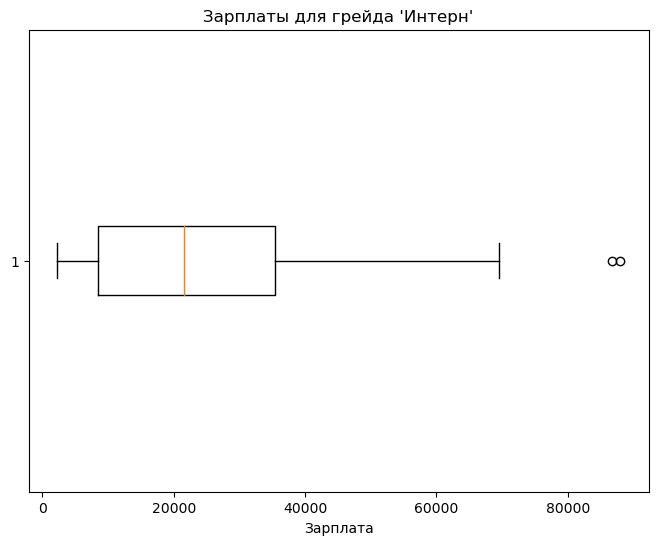

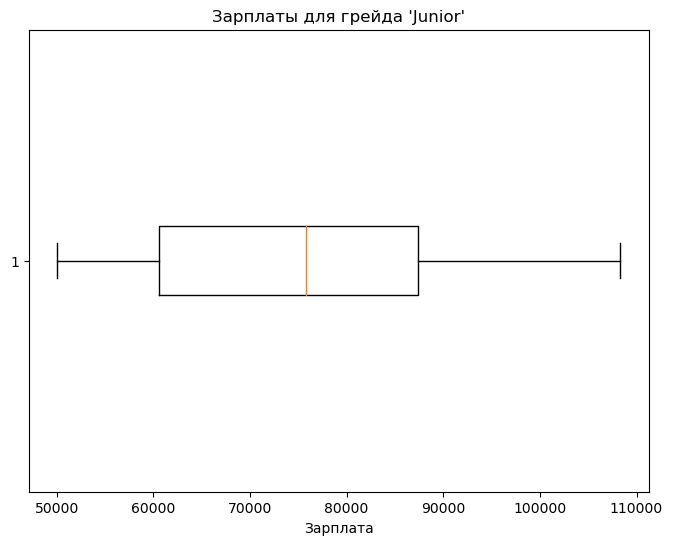

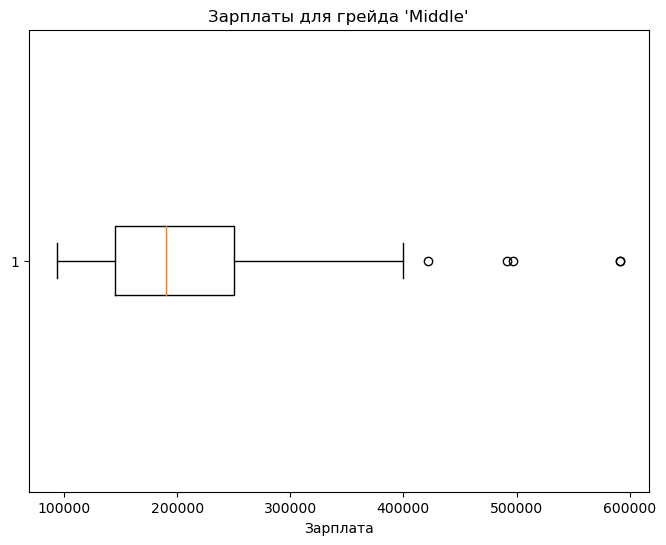

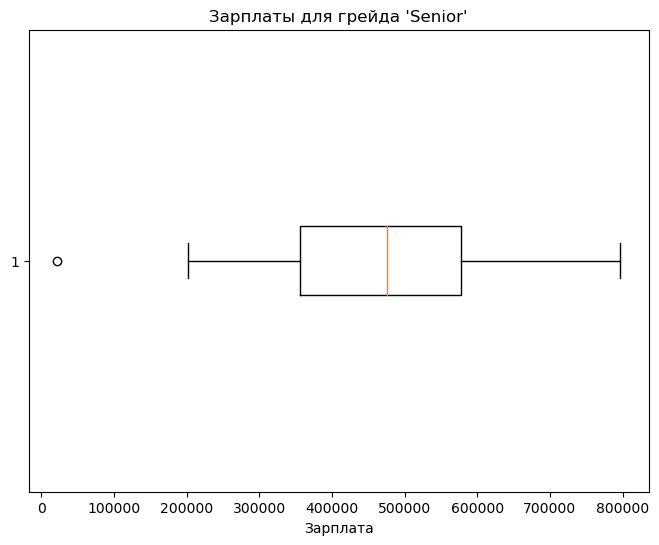

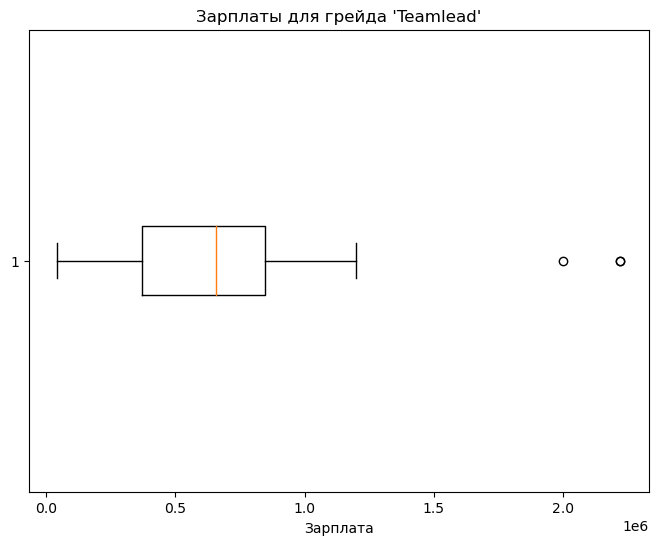

In [83]:
# Построение боксплота для грейда 'Интерн'
plt.figure(figsize=(8, 6))
plt.boxplot(intern_df['Salary'], vert=False)
plt.title("Зарплаты для грейда 'Интерн'")
plt.xlabel("Зарплата")
plt.show()

# Построение боксплота для грейда 'Junior'
plt.figure(figsize=(8, 6))
plt.boxplot(junior_df['Salary'], vert=False)
plt.title("Зарплаты для грейда 'Junior'")
plt.xlabel("Зарплата")
plt.show()

# Построение боксплота для грейда 'Middle'
plt.figure(figsize=(8, 6))
plt.boxplot(middle_df['Salary'], vert=False)
plt.title("Зарплаты для грейда 'Middle'")
plt.xlabel("Зарплата")
plt.show()

# Построение боксплота для грейда 'Senior'
plt.figure(figsize=(8, 6))
plt.boxplot(senior_df['Salary'], vert=False)
plt.title("Зарплаты для грейда 'Senior'")
plt.xlabel("Зарплата")
plt.show()

# Построение боксплота для грейда 'Teamlead'
plt.figure(figsize=(8, 6))
plt.boxplot(teamlead_df['Salary'], vert=False)
plt.title("Зарплаты для грейда 'Teamlead'")
plt.xlabel("Зарплата")
plt.show()


Отлично, проверив боксплоты мы нашли точки аномальных значений зарплат для всех грейдов, кроме джуниор специалистов. Чтобы устранить аномальные значения применим фильтрацию.

In [80]:
# Отсечение аномальных значений для датафрейма грейда 'Интерн'
intern_df_filtered = intern_df[(intern_df['Salary'] >= lower_bound_intern) & (intern_df['Salary'] <= upper_bound_intern)]

# Отсечение аномальных значений для датафрейма грейда 'Junior'
junior_df_filtered = junior_df[(junior_df['Salary'] >= lower_bound_junior) & (junior_df['Salary'] <= upper_bound_junior)]

# Отсечение аномальных значений для датафрейма грейда 'Middle'
middle_df_filtered = middle_df[(middle_df['Salary'] >= lower_bound_middle) & (middle_df['Salary'] <= upper_bound_middle)]

# Отсечение аномальных значений для датафрейма грейда 'Senior'
senior_df_filtered = senior_df[(senior_df['Salary'] >= lower_bound_senior) & (senior_df['Salary'] <= upper_bound_senior)]

# Отсечение аномальных значений для датафрейма грейда 'Teamlead'
teamlead_df_filtered = teamlead_df[(teamlead_df['Salary'] >= lower_bound_teamlead) & (teamlead_df['Salary'] <= upper_bound_teamlead)]


In [81]:
# Вывод отфильтрованных данных для грейда 'Интерн'
print("Отфильтрованные данные для грейда 'Интерн':")
print(intern_df_filtered)

# Вывод отфильтрованных данных для грейда 'Junior'
print("\nОтфильтрованные данные для грейда 'Junior':")
print(junior_df_filtered)

# Вывод отфильтрованных данных для грейда 'Middle'
print("\nОтфильтрованные данные для грейда 'Middle':")
print(middle_df_filtered)

# Вывод отфильтрованных данных для грейда 'Senior'
print("\nОтфильтрованные данные для грейда 'Senior':")
print(senior_df_filtered)

# Вывод отфильтрованных данных для грейда 'Teamlead'
print("\nОтфильтрованные данные для грейда 'Teamlead':")
print(teamlead_df_filtered)


Отфильтрованные данные для грейда 'Интерн':
      User_id  Salary                      City Specialization   Grade
5      540058    2511                  Таганрог   Тестирование  Intern
6      819011    3131          Великий Новгород   Тестирование  Intern
7      197075   57063  Петропавловск-Камчатский      Маркетинг  Intern
12     265221    3586                  Таганрог   Тестирование  Intern
17     470242   43963                 Краснодар      Маркетинг  Intern
...       ...     ...                       ...            ...     ...
979    509942    9339                  Мурманск     Разработка  Intern
983    502440   30304           Санкт-Петербург      Аналитика  Intern
1001   910569   68047               Владивосток      Маркетинг  Intern
1011   792990   17112                   Иркутск     Разработка  Intern
1028   487640   36538  Петропавловск-Камчатский      Поддержка  Intern

[194 rows x 5 columns]

Отфильтрованные данные для грейда 'Junior':
      User_id  Salary              

ПОСТРОИМ БОКСПЛОТЫ ПО ОТФИЛЬТРОВАННЫМ ДАННЫМ И ПРОВЕРИМ АНОМАЛИИ

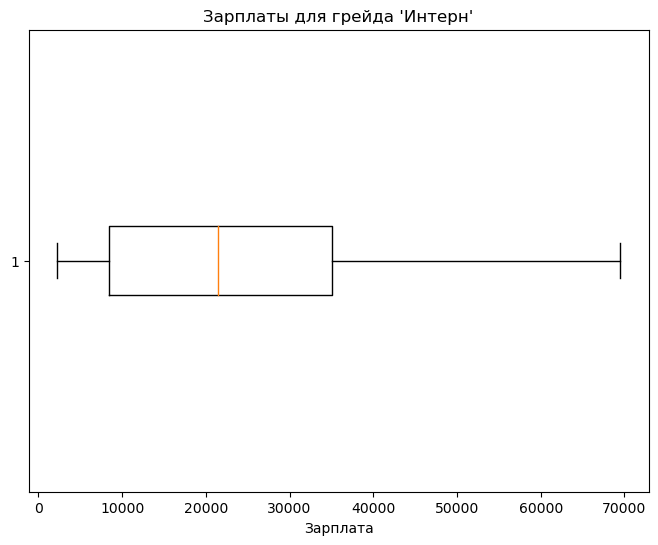

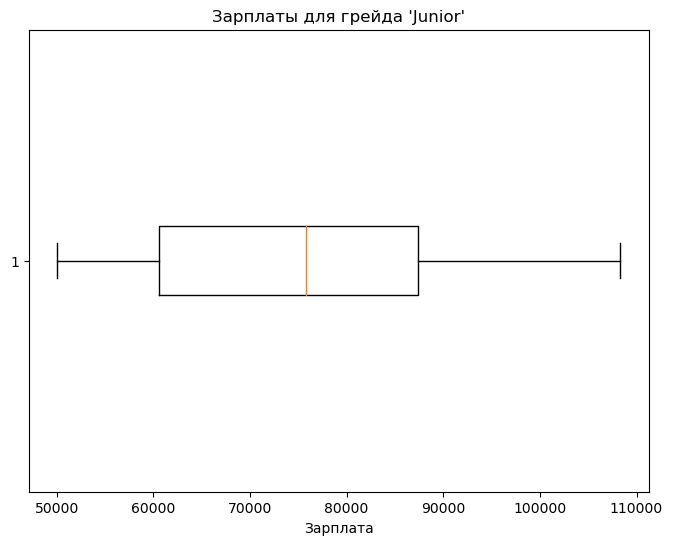

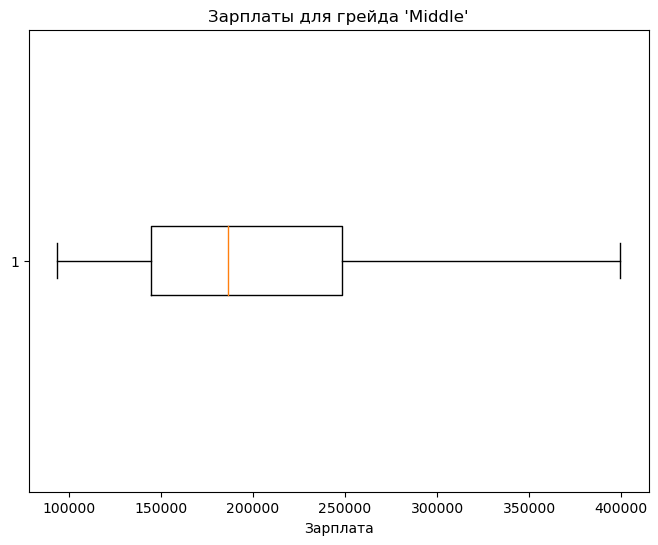

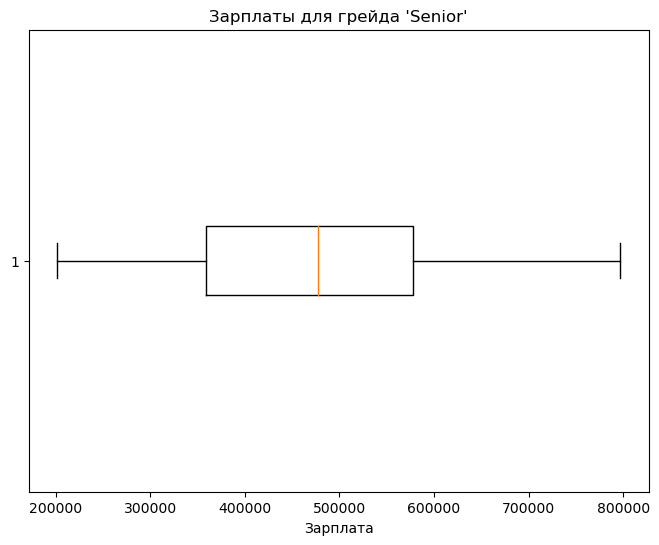

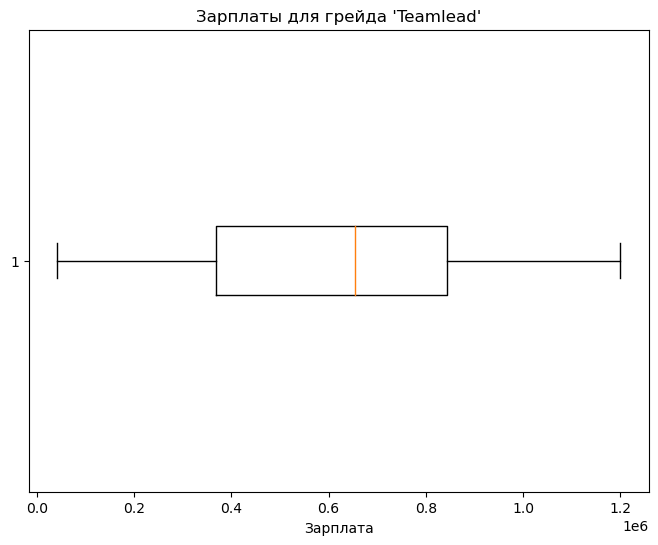

In [82]:
import matplotlib.pyplot as plt

# Построение боксплота для грейда 'Интерн'
plt.figure(figsize=(8, 6))
plt.boxplot(intern_df_filtered['Salary'], vert=False)
plt.title("Зарплаты для грейда 'Интерн'")
plt.xlabel("Зарплата")
plt.show()

# Построение боксплота для грейда 'Junior'
plt.figure(figsize=(8, 6))
plt.boxplot(junior_df_filtered['Salary'], vert=False)
plt.title("Зарплаты для грейда 'Junior'")
plt.xlabel("Зарплата")
plt.show()

# Построение боксплота для грейда 'Middle'
plt.figure(figsize=(8, 6))
plt.boxplot(middle_df_filtered['Salary'], vert=False)
plt.title("Зарплаты для грейда 'Middle'")
plt.xlabel("Зарплата")
plt.show()

# Построение боксплота для грейда 'Senior'
plt.figure(figsize=(8, 6))
plt.boxplot(senior_df_filtered['Salary'], vert=False)
plt.title("Зарплаты для грейда 'Senior'")
plt.xlabel("Зарплата")
plt.show()

# Построение боксплота для грейда 'Teamlead'
plt.figure(figsize=(8, 6))
plt.boxplot(teamlead_df_filtered['Salary'], vert=False)
plt.title("Зарплаты для грейда 'Teamlead'")
plt.xlabel("Зарплата")
plt.show()


Исходя из проделанной работы можно сделать вывод, что в исходных данных по зарплатам специалистов были аномальные значения зарплат.

Зарплаты будут считаться аномальными, если будут выходить за значения усов боксплотов. В анализе я не учитывал разницу зарплат в регионах и в Москве.

Разработчикам следует отфильтровывать/удалять аномальные значения, которые выходят за пределы нижней и верхней границы квартилей.